# Análises serão sobre:

1. Segmento
2. Tamanho da empresa
3. Relação entre região e cargo
4. Produto x Região
5. Idioma de contato

In [1]:
##---------------------( Importar as bibliotecas )---------------------##

import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

##---------------------( Carregar os dados )---------------------##

# dados = pd.read_excel('Dados-Analise-IA.xlsx', sheet_name='Contato')
dados = pd.read_csv('arquivo-dados-contato.csv', sep=',')

# Primeira análise será pelo cadastro do visitante.


In [2]:
# visualizar os dados de forma resumida, com 5 itens somente
dados.head()

,Nome,Sobrenome,Email,Telefone,Segmento,Cargo,TamanhodaEmpresa,Produto,Região,Idioma
0,Ana,Silva,ana.silva@email.com,(11)98765-4321,Tecnologia,Analista,Pequena,IA,SãoPaulo,Português
1,João,Oliveira,joao.oliveira@email.com,(21)12345-6789,Varejo,Gerente,Média,Marketing,Rio de Janeiro,Inglês
2,Maria,Santos,maria.santos@email.com,(31)55555-5555,Saúde,Diretor,Grande,Commerce,Minas Gerais,Espanhol
3,Pedro,Almeida,pedro.almeida@email.com,(31)98765-1234,Finanças,CEO,Multinacional,NuvemDados,Minas Gerais,Português
4,Camila,Lima,camila.lima@email.com,(51)22222-2222,Educação,Coordenador,Pequena,MuleSoft,Rio Grande do Sul,Espanhol


In [3]:
# criar um dataframe
tabela = pd.DataFrame(dados)
tabela.head()

,Nome,Sobrenome,Email,Telefone,Segmento,Cargo,TamanhodaEmpresa,Produto,Região,Idioma
0,Ana,Silva,ana.silva@email.com,(11)98765-4321,Tecnologia,Analista,Pequena,IA,SãoPaulo,Português
1,João,Oliveira,joao.oliveira@email.com,(21)12345-6789,Varejo,Gerente,Média,Marketing,Rio de Janeiro,Inglês
2,Maria,Santos,maria.santos@email.com,(31)55555-5555,Saúde,Diretor,Grande,Commerce,Minas Gerais,Espanhol
3,Pedro,Almeida,pedro.almeida@email.com,(31)98765-1234,Finanças,CEO,Multinacional,NuvemDados,Minas Gerais,Português
4,Camila,Lima,camila.lima@email.com,(51)22222-2222,Educação,Coordenador,Pequena,MuleSoft,Rio Grande do Sul,Espanhol


In [4]:
tabela.columns

Index(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Segmento', 'Cargo',
       'TamanhodaEmpresa', 'Produto', 'Região', 'Idioma'],
      dtype='object')

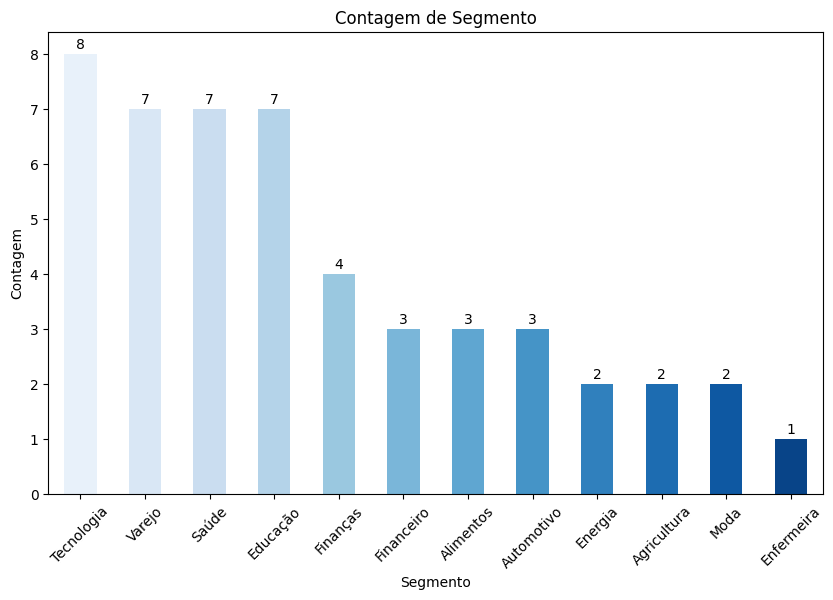

In [5]:
##---------------------( Análise Segmento )---------------------##

# Criar DataFrame só para análise do segmento
df_segmento = pd.DataFrame(tabela)

contagem_segmento = df_segmento['Segmento'].value_counts()

# Paleta de cores
cores_azuis = sns.color_palette("Blues", len(contagem_segmento))

# Gráfico
plt.figure(figsize=(10, 6))
contagem_segmento.plot(kind='bar', color=cores_azuis)
plt.title('Contagem de Segmento')
plt.xlabel('Segmento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Adicionar os valores em cada barra para facilitar a visualização
for i, valor in enumerate(contagem_segmento):
    plt.text(i, valor + 0.1, str(valor), ha='center')

plt.show()


# Análise sobre o segmento

Com base na análise realizada, os segmentos que mais demonstram interesse em adotar novas soluções são Tecnologia, Saúde, Varejo e Educação, os quais, combinados, representam mais de 50% do meu público-alvo. Esses segmentos são altamente receptivos aos produtos que tenho a oferecer, alinhando-se de forma significativa às necessidades e demandas específicas desses setores. Essa observação reforça a importância de direcionar esforços e recursos para atender às demandas desses segmentos, uma vez que representam uma parcela substancial do mercado em potencial e têm maior propensão a adotar e utilizar as soluções oferecidas pela empresa.

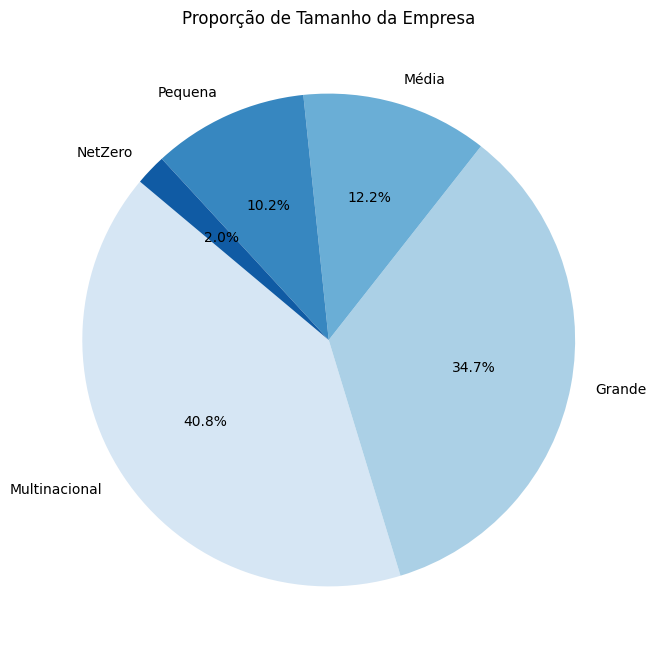

In [6]:
##---------------------( Análise pelo Tamanho da empresa  )---------------------## 

# Criar DataFrame
df_tamanho = pd.DataFrame(dados)

# tamanho da empresa
proporcao_tamanho = df_tamanho['TamanhodaEmpresa'].value_counts()

# Paleta de cores
paleta_azul = sns.color_palette("Blues", len(proporcao_tamanho))

# Gráfico
plt.figure(figsize=(8, 8))
proporcao_tamanho.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=paleta_azul)
plt.title('Proporção de Tamanho da Empresa')
plt.ylabel('')
plt.show()

# Análise com base no tamanho da empresa

Ao analisar a distribuição dos tamanhos das empresas em relação ao meu negócio, observa-se uma proporção significativa entre os diferentes segmentos. As multinacionais destacam-se como o maior grupo, representando 40.8% do total. Esse dado indica uma importante oportunidade de expansão e colaboração em escala global, visto que empresas multinacionais geralmente possuem recursos e alcance internacional que podem beneficiar a aplicação dos módulos de produtos que hoje temos e podem trazer melhores soluções e redução de custos para seus negócios.

Em seguida, as empresas classificadas como "Grande" constituem 36.7% do total. Esse grupo também desempenha um papel crucial, uma vez que empresas de grande porte muitas vezes possuem uma estrutura organizacional sólida e uma base de clientes ampla, o que pode proporcionar parcerias estratégicas e oportunidades de crescimento significativas. Essas empresas possuem muita parte do processo hoje de forma manual e algumas ainda não devem ter sistemas únicos e integrados o que facilita a venda de novos módulos que podem trazer bons frutos para elas.

Por fim, as empresas de porte "Médio", representando 12.2% do total, embora em menor proporção, não devem ser negligenciadas. Elas geralmente possuem flexibilidade e agilidade para inovação e estão em um estágio de crescimento que pode se alinhar bem com as soluções oferecidas pela minha empresa.

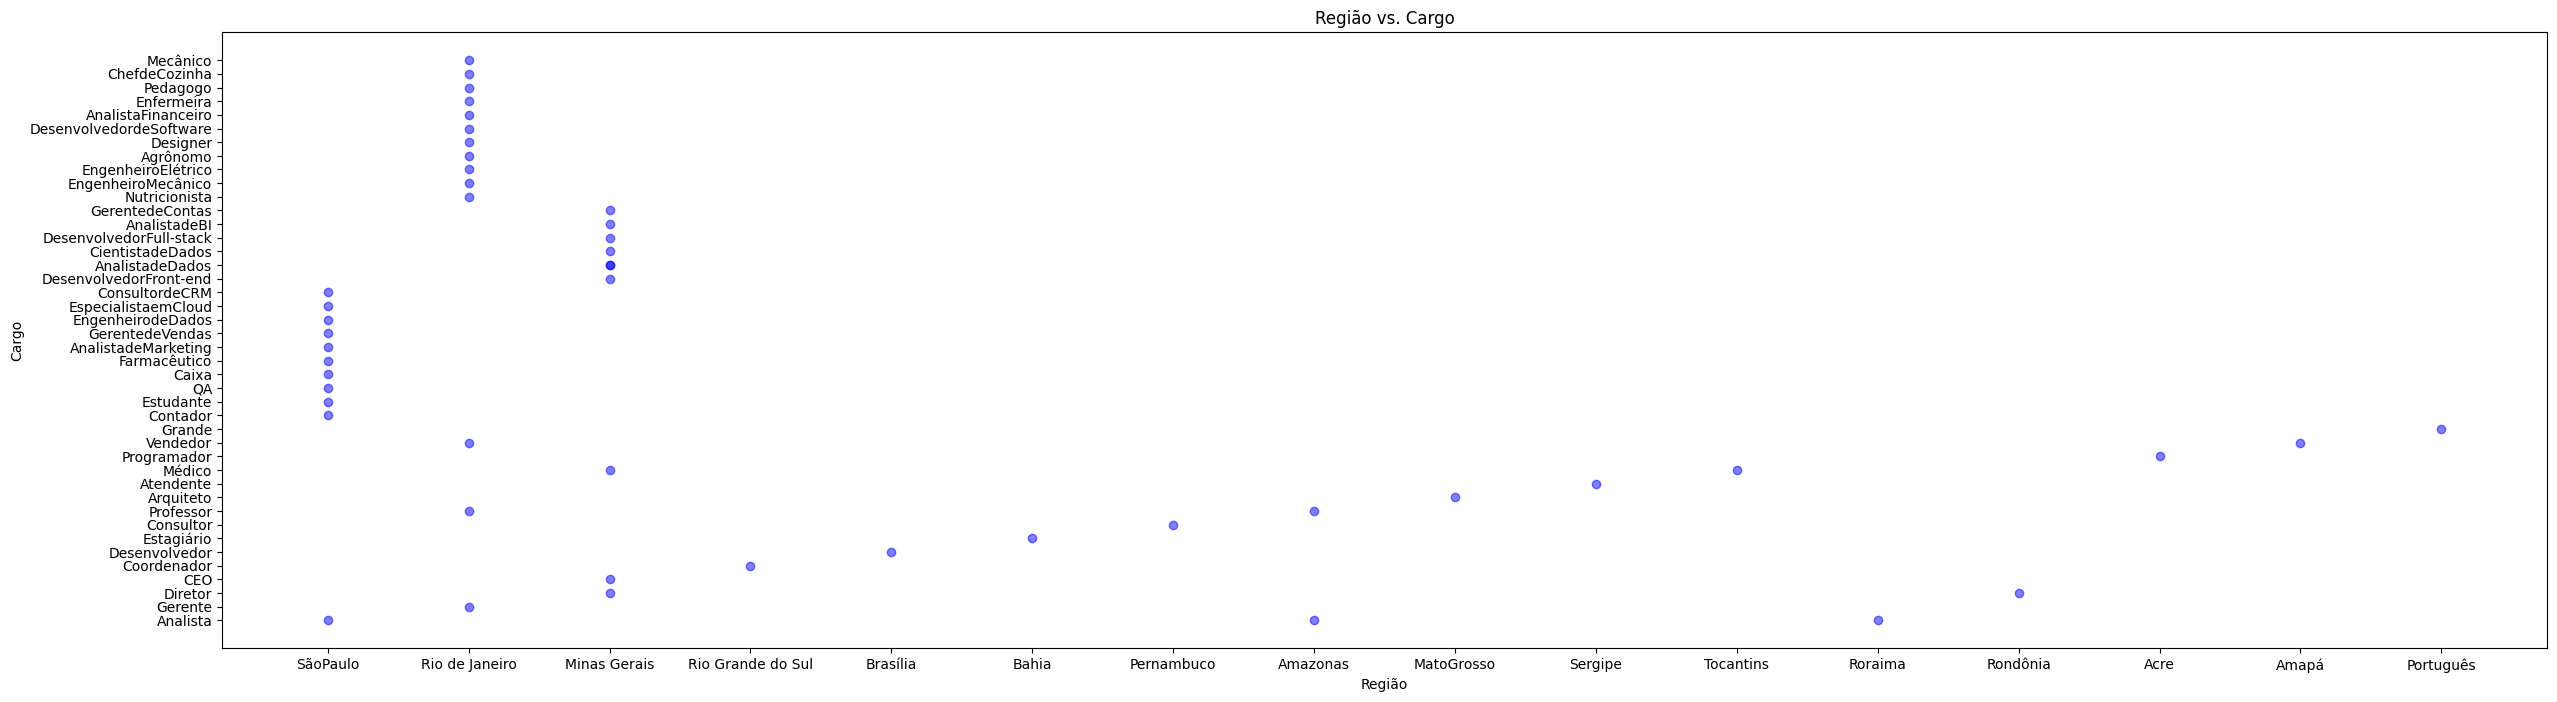

In [7]:
##---------------------( Análise para avaliar cargo x região  )---------------------## 

# Criar DataFrame
df_cargo_regiao = pd.DataFrame(dados)

# Gráfico
plt.figure(figsize=(30, 8))
plt.scatter(df_cargo_regiao['Região'], df_cargo_regiao['Cargo'], color='blue', alpha=0.5)
plt.title('Região vs. Cargo')
plt.xlabel('Região')
plt.ylabel('Cargo')
plt.show()


# Análise sobre a região e cargo

A análise do interesse em nossos serviços e produtos, com base na região e no cargo dos interessados, destaca São Paulo, Rio de Janeiro e Minas Gerais como os locais com a maior diversidade de demanda por parte de profissionais de vários cargos. Notavelmente, observa-se um entusiasmo particular entre os indivíduos em cargos de gestão nessas regiões, indicando uma forte inclinação para a inovação e a adoção de novas tecnologias. Esse interesse acentuado de gestores sugere uma disposição em investir em suas empresas através da integração de novas soluções tecnológicas e módulos complementares aos sistemas já existentes. Tal tendência não apenas sublinha a importância de nossos produtos e serviços para o aprimoramento e a eficiência operacional das empresas, mas também aponta para uma oportunidade estratégica de direcionar nossos esforços de marketing e desenvolvimento de produto para atender às necessidades específicas desse segmento. Portanto, é recomendável explorar mais a fundo as particularidades dessas demandas para criar ofertas personalizadas que maximizem o valor para esses líderes empresariais e suas organizações.

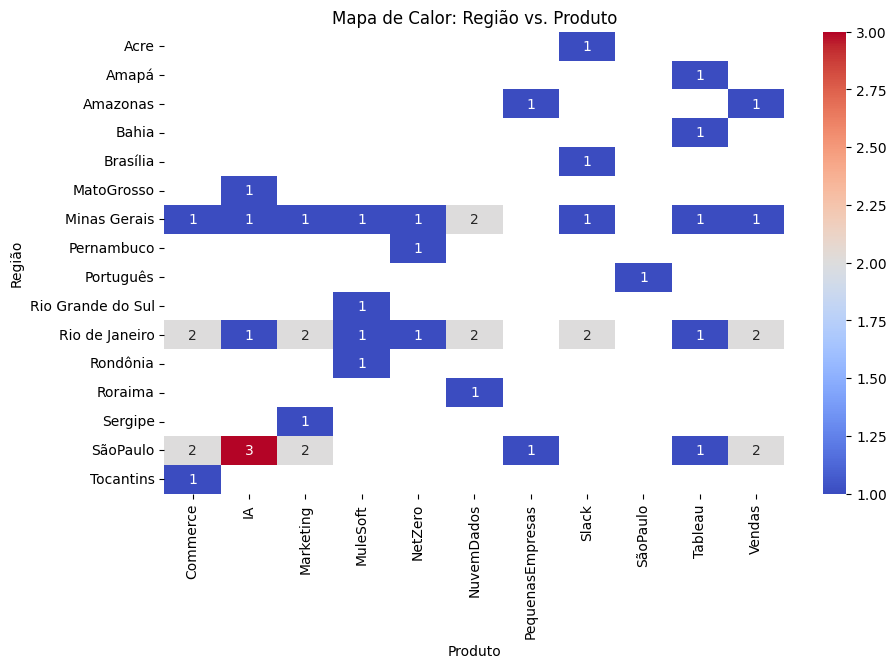

In [8]:
##---------------------( Análise para avaliar Região x Produto  )---------------------## 

# Criar DataFrame
df_regiao_produto = pd.DataFrame(dados)

# Gráfico
heatmap_data = pd.pivot_table(df_regiao_produto, values='Nome', index='Região', columns='Produto', aggfunc='count')
plt.figure(figsize=(10, 6))
plt.title('Mapa de Calor: Região vs. Produto')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.show()


# Análise sobre produto x Região

A análise dos dados relativos à demanda por produtos por região revelou uma tendência ambígua, sem direcionamentos claros para futuros investimentos baseados nos produtos atuais. A exceção notável foi a região de São Paulo, onde observamos um interesse acima da média por produtos relacionados à Inteligência Artificial (IA), indicando uma procura significativa. Fora de São Paulo, as buscas por nossos produtos permaneceram consistentemente baixas, com uma média de uma a duas buscas por região, sugerindo um interesse moderado que não se destaca de maneira significativa. Esta análise sugere que, embora a maior parte das regiões não demonstre um interesse elevado em nossa gama atual de produtos, São Paulo representa uma oportunidade valiosa para focar na oferta de soluções em IA. Portanto, recomenda-se considerar estratégias de marketing e desenvolvimento de produto que alavanquem esse interesse específico em São Paulo, ao mesmo tempo que se continua a avaliar oportunidades de engajamento nas outras regiões.


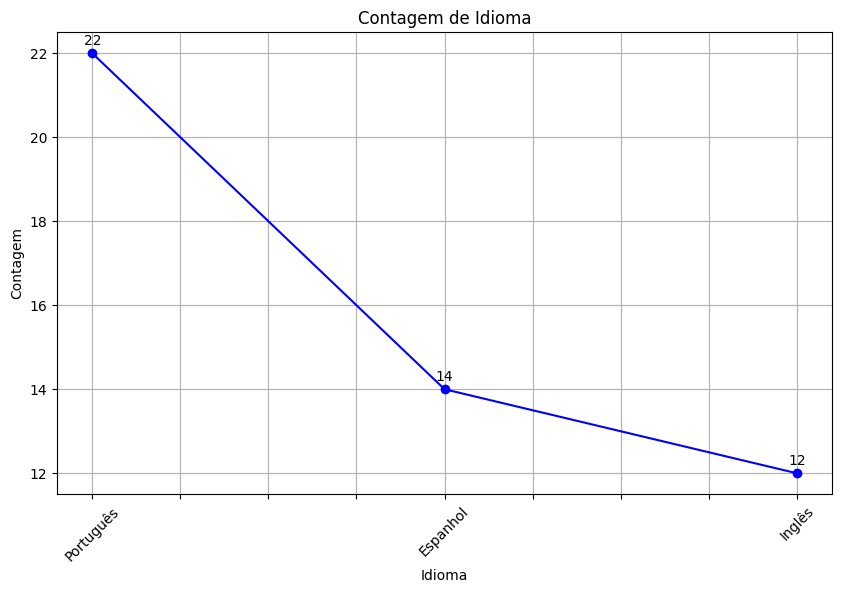

In [9]:
##---------------------( Análise pelo Idioma de contato  )---------------------## 

# Aqui posso precisar contratar mais gente especializada em uma lingua por exemplo.

# Criar DataFrame
df_idioma = pd.DataFrame(dados)

# Contagem de idiomas
contagem_idioma = df_idioma['Idioma'].value_counts()

# Gráfico
plt.figure(figsize=(10, 6))
contagem_idioma.plot(kind='line', marker='o', color='blue')
plt.title('Contagem de Idioma')
plt.xlabel('Idioma')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(True)

# Adicionar os números nas bolinhas com a quantidade de contatos
for i, valor in enumerate(contagem_idioma):
    plt.text(i, valor + 0.2, str(valor), ha='center', color='black')

plt.show()

# Análise com base no idioma de contato

A análise dos dados coletados sobre as preferências linguísticas dos nossos visitantes indica que, embora nosso idioma principal continue a ser o mais escolhido, há uma demanda significativa para opções de tradução em inglês e espanhol. Essa tendência sugere a oportunidade de expandir nossa acessibilidade, adaptando nosso conteúdo — incluindo vídeos, textos e interações no chatbot — para esses idiomas. Especificamente, o espanhol emerge como uma prioridade secundária, refletindo uma necessidade clara de desenvolver conteúdo nessa língua. Implementar essas traduções não apenas aprimorará a experiência do usuário, permitindo que eles interajam com nosso conteúdo na língua de sua preferência, mas também expandirá nosso alcance a um público mais amplo. Esta estratégia está alinhada com nosso objetivo de sermos mais inclusivos e acessíveis, ao mesmo tempo que mantemos o compromisso com a qualidade e a relevância do conteúdo oferecido.